In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Hr_analytics.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [4]:
df.shape

(1470, 35)

In [5]:
df["MaritalStatus"].unique()

array(['Single', 'Married', 'Divorced'], dtype=object)

In [6]:
df["Gender"].unique()

array(['Female', 'Male'], dtype=object)

In [7]:
# Checking for null values

df.isnull().sum()
# We see that there are no null values

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [8]:
# Converting categorical to numerical data - i.e type and region

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder() 

df[['Attrition','BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','Over18','OverTime']] = df[['Attrition','BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','Over18','OverTime']].apply(label_encoder.fit_transform)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2


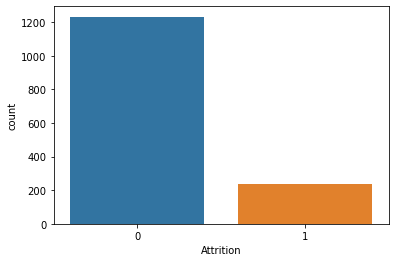

In [9]:
# Univariate analysis

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(df["Attrition"])
plt.show()

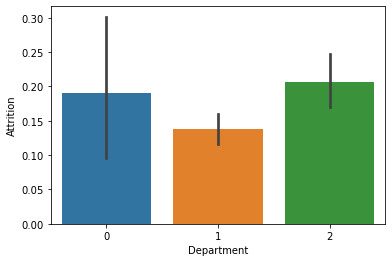

In [10]:
# Bivariate analysis

sns.barplot(x=df["Department"],y=df["Attrition"])
plt.show()

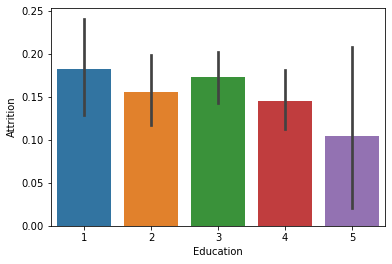

In [35]:
sns.barplot(x=df["Education"],y=df["Attrition"])
plt.show()

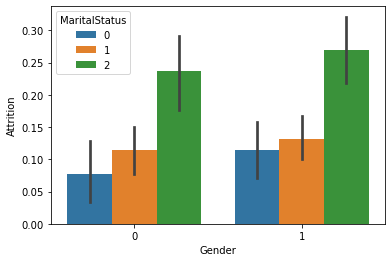

In [12]:
sns.barplot(x=df["Gender"],y=df["Attrition"],hue=df["MaritalStatus"])
plt.show()

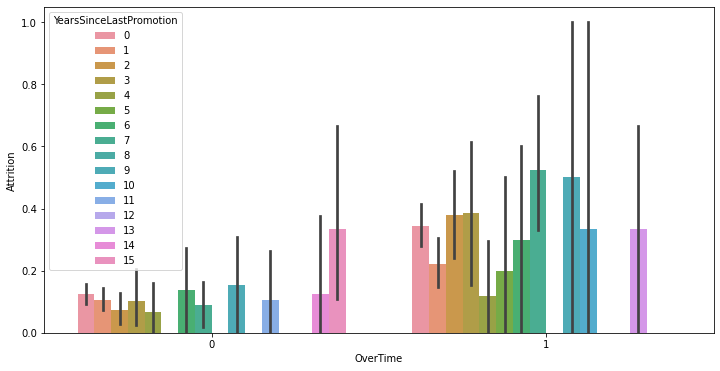

In [13]:
plt.figure(figsize=(12,6))
sns.barplot(x=df["OverTime"],y=df["Attrition"],hue=df["YearsSinceLastPromotion"])
plt.show()

In [14]:
# PCA
# There are 34 independent variables, we use pca to reduce dimension

x=df.drop("Attrition",axis=1)
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
x=pca.fit_transform(x)
x = pd.DataFrame(x)
x.head()

,0,1,2,3,4,5,6,7,8,9
0,5139.144002,-718.086191,-1047.618131,-246.007141,-29.136113,1.102347,-8.859410,-2.056755,-3.903597,-3.042514
1,10528.865129,-1802.653430,-1004.883381,565.245196,2.458596,12.782940,-2.587402,-0.036459,8.333818,-5.521375
2,-12089.425921,-3920.145490,-1048.000222,-488.847990,-25.899679,1.413627,-7.626811,-6.546913,-0.704655,2.265187
3,8689.622047,-3949.517598,-1072.175400,-544.170543,9.364752,0.367456,-5.841633,4.627869,-4.249530,-0.734101
4,2192.360869,-3125.191133,-1012.117528,267.180275,24.634854,-7.528494,-5.877370,-1.019278,-3.540293,3.531609


In [15]:
y = df[["Attrition"]]
dfn =  pd.concat([x,y],axis=1)
dfn.head()

,0,1,2,3,4,5,6,7,8,9,Attrition
0,5139.144002,-718.086191,-1047.618131,-246.007141,-29.136113,1.102347,-8.859410,-2.056755,-3.903597,-3.042514,1
1,10528.865129,-1802.653430,-1004.883381,565.245196,2.458596,12.782940,-2.587402,-0.036459,8.333818,-5.521375,0
2,-12089.425921,-3920.145490,-1048.000222,-488.847990,-25.899679,1.413627,-7.626811,-6.546913,-0.704655,2.265187,1
3,8689.622047,-3949.517598,-1072.175400,-544.170543,9.364752,0.367456,-5.841633,4.627869,-4.249530,-0.734101,0
4,2192.360869,-3125.191133,-1012.117528,267.180275,24.634854,-7.528494,-5.877370,-1.019278,-3.540293,3.531609,0


In [16]:
# Correlation

dfn.corr()

,0,1,2,3,4,5,6,7,8,9,Attrition
0,1.000000e+00,3.403700e-17,0.000000e+00,1.229424e-17,4.794125e-19,-3.638787e-17,1.890720e-18,-4.565894e-18,1.356323e-17,-2.441027e-17,0.010840
1,3.403700e-17,1.000000e+00,-2.449906e-17,1.916040e-18,1.031853e-17,-3.574124e-17,1.005279e-17,-2.278811e-18,-3.935148e-17,7.442153e-18,-0.160817
2,0.000000e+00,-2.449906e-17,1.000000e+00,3.636668e-18,-3.298471e-17,-8.051807e-18,-2.142555e-17,4.175382e-17,-8.407404e-19,-5.151791e-18,-0.010991
3,1.229424e-17,1.916040e-18,3.636668e-18,1.000000e+00,-2.691333e-17,-4.011819e-18,2.854364e-17,1.703538e-17,7.606536e-19,2.245966e-17,0.055998
4,4.794125e-19,1.031853e-17,-3.298471e-17,-2.691333e-17,1.000000e+00,-3.665414e-16,-2.922647e-16,-3.041164e-16,3.104546e-17,-4.973081e-17,0.007309
5,-3.638787e-17,-3.574124e-17,-8.051807e-18,-4.011819e-18,-3.665414e-16,1.000000e+00,-9.535379e-16,-1.003354e-16,-4.655494e-17,2.672716e-16,-0.096768
6,1.890720e-18,1.005279e-17,-2.142555e-17,2.854364e-17,-2.922647e-16,-9.535379e-16,1.000000e+00,1.726021e-16,8.608552e-17,-3.970115e-16,0.085954
7,-4.565894e-18,-2.278811e-18,4.175382e-17,1.703538e-17,-3.041164e-16,-1.003354e-16,1.726021e-16,1.000000e+00,-1.560966e-16,1.151275e-16,-0.048233
8,1.356323e-17,-3.935148e-17,-8.407404e-19,7.606536e-19,3.104546e-17,-4.655494e-17,8.608552e-17,-1.560966e-16,1.000000e+00,1.281796e-15,-0.026130
9,-2.441027e-17,7.442153e-18,-5.151791e-18,2.245966e-17,-4.973081e-17,2.672716e-16,-3.970115e-16,1.151275e-16,1.281796e-15,1.000000e+00,0.034283


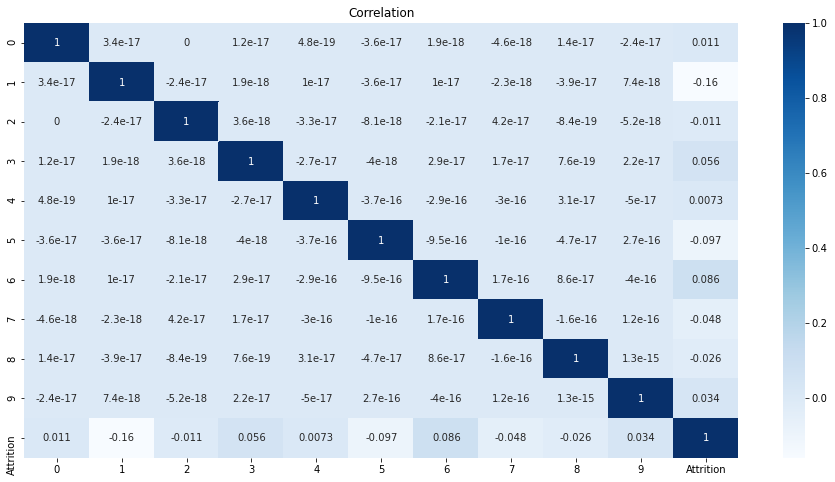

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.title("Correlation")
sns.heatmap(dfn.corr(),annot=True,cmap='Blues')
plt.show()

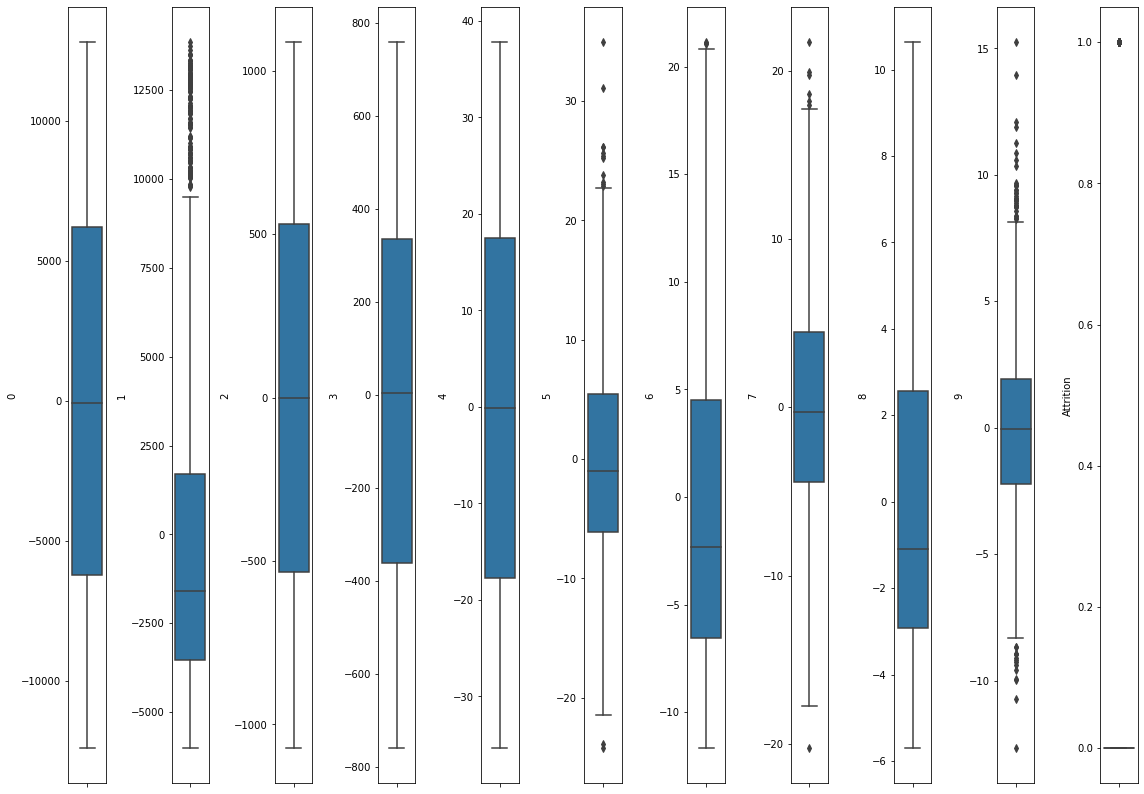

In [18]:
# Checking for outliers

collist = dfn.columns.values
ncol = 11
nrows = 5

plt.figure(figsize=(16,5*ncol))
for i in range(len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(dfn[collist[i]],orient = "v")
    plt.tight_layout()

In [19]:
# Removing outliers

from scipy.stats import zscore
z=np.abs(zscore(dfn))
df_new=dfn[(z<3).all(axis=1)]
df_new.head()

,0,1,2,3,4,5,6,7,8,9,Attrition
0,5139.144002,-718.086191,-1047.618131,-246.007141,-29.136113,1.102347,-8.859410,-2.056755,-3.903597,-3.042514,1
1,10528.865129,-1802.653430,-1004.883381,565.245196,2.458596,12.782940,-2.587402,-0.036459,8.333818,-5.521375,0
2,-12089.425921,-3920.145490,-1048.000222,-488.847990,-25.899679,1.413627,-7.626811,-6.546913,-0.704655,2.265187,1
3,8689.622047,-3949.517598,-1072.175400,-544.170543,9.364752,0.367456,-5.841633,4.627869,-4.249530,-0.734101,0
4,2192.360869,-3125.191133,-1012.117528,267.180275,24.634854,-7.528494,-5.877370,-1.019278,-3.540293,3.531609,0


In [20]:
dfn.shape

(1470, 11)

In [21]:
df_new.shape

(1456, 11)

In [22]:
dfn = df_new

In [23]:
# Skewness

dfn.skew()

0            0.015077
1            1.376187
2            0.005391
3            0.005493
4            0.027586
5            0.447971
6            0.911451
7            0.127869
8            0.825614
9            0.131263
Attrition    1.863480
dtype: float64

In [24]:
# Splitting independent variables and target

x = dfn.drop('Attrition',axis=1)
print(x.head())
y = dfn[['Attrition']]
print("\n")
print(y.head())

              0            1            2           3          4          5  \
0   5139.144002  -718.086191 -1047.618131 -246.007141 -29.136113   1.102347   
1  10528.865129 -1802.653430 -1004.883381  565.245196   2.458596  12.782940   
2 -12089.425921 -3920.145490 -1048.000222 -488.847990 -25.899679   1.413627   
3   8689.622047 -3949.517598 -1072.175400 -544.170543   9.364752   0.367456   
4   2192.360869 -3125.191133 -1012.117528  267.180275  24.634854  -7.528494   

          6         7         8         9  
0 -8.859410 -2.056755 -3.903597 -3.042514  
1 -2.587402 -0.036459  8.333818 -5.521375  
2 -7.626811 -6.546913 -0.704655  2.265187  
3 -5.841633  4.627869 -4.249530 -0.734101  
4 -5.877370 -1.019278 -3.540293  3.531609  


   Attrition
0          1
1          0
2          1
3          0
4          0


In [25]:
# Using Standard scaler for uniform range in all columns

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x = sc.fit_transform(x)
x = pd.DataFrame(x)
x.head()

,0,1,2,3,4,5,6,7,8,9
0,0.718979,-0.152241,-1.747783,-0.612488,-1.440208,0.149373,-1.097579,-0.305474,-1.072065,-0.905582
1,1.477336,-0.382495,-1.676684,1.404016,0.115787,1.524304,-0.319528,-0.007892,2.268985,-1.656336
2,-1.705156,-0.832040,-1.748419,-1.216110,-1.280818,0.186014,-0.944673,-0.966857,-0.198692,0.701921
3,1.218547,-0.838276,-1.788639,-1.353623,0.455906,0.062869,-0.723219,0.679146,-1.166512,-0.206451
4,0.304354,-0.663271,-1.688720,0.663125,1.207937,-0.866570,-0.727653,-0.152657,-0.972876,1.085472


In [26]:
# Splitting into training and testing data

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=52)

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [29]:
model = [GaussianNB(),SVC(),DecisionTreeClassifier(),KNeighborsClassifier(),LogisticRegression()]

for m in model:
    m.fit(x_train,y_train)
    print(m.score(x_train,y_train))
    predm=m.predict(x_test)
    print("accuracy score of", m,"is")
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print("\n")

0.8350515463917526
accuracy score of GaussianNB() is
0.8698630136986302
[[254   0]
 [ 38   0]]
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       254
           1       0.00      0.00      0.00        38

    accuracy                           0.87       292
   macro avg       0.43      0.50      0.47       292
weighted avg       0.76      0.87      0.81       292



0.834192439862543
accuracy score of SVC() is
0.8698630136986302
[[254   0]
 [ 38   0]]
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       254
           1       0.00      0.00      0.00        38

    accuracy                           0.87       292
   macro avg       0.43      0.50      0.47       292
weighted avg       0.76      0.87      0.81       292



1.0
accuracy score of DecisionTreeClassifier() is
0.75
[[211  43]
 [ 30   8]]
              precision    recall  f1-score   support

           0       0.88    

In [30]:
# Gridsearch cv on SVC

from sklearn.model_selection import GridSearchCV

svc = SVC()
p = {'kernel':['linear', 'poly', 'rbf'], 'gamma':['scale','auto']}
a = GridSearchCV(svc,p)
a.fit(x,y)
a.best_params_

{'gamma': 'scale', 'kernel': 'linear'}

In [31]:
# SVC after hyperparameter tuning

svc = SVC(kernel='linear') #gamma=scale is default
svc.fit(x_train,y_train)
print(svc.score(x_train,y_train))
pred=svc.predict(x_test)
print("Accuracy score of", svc ,"is")
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.8333333333333334
Accuracy score of SVC(kernel='linear') is
0.8698630136986302
[[254   0]
 [ 38   0]]
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       254
           1       0.00      0.00      0.00        38

    accuracy                           0.87       292
   macro avg       0.43      0.50      0.47       292
weighted avg       0.76      0.87      0.81       292



In [32]:
# cross_val_score

from sklearn.model_selection import cross_val_score

print("Cross_val_score for",svc ,'is ',cross_val_score(svc,x,y,cv=5).mean())

Cross_val_score for SVC(kernel='linear') is  0.8406604528550581


In [33]:
# Ensemble - adaboost with svc

from sklearn.ensemble import AdaBoostClassifier
ad = AdaBoostClassifier(base_estimator=svc,algorithm='SAMME')
ad.fit(x_train,y_train)
pred=ad.predict(x_test)
print("Accuracy score of", ad ,"is")
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
print("Cross_val_score for",ad ,'is ',cross_val_score(ad,x,y,cv=5).mean())

Accuracy score of AdaBoostClassifier(algorithm='SAMME', base_estimator=SVC(kernel='linear')) is
0.8698630136986302
[[254   0]
 [ 38   0]]
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       254
           1       0.00      0.00      0.00        38

    accuracy                           0.87       292
   macro avg       0.43      0.50      0.47       292
weighted avg       0.76      0.87      0.81       292

Cross_val_score for AdaBoostClassifier(algorithm='SAMME', base_estimator=SVC(kernel='linear')) is  0.8406604528550581


In [34]:
# Saving the model

import joblib

joblib.dump(ad,'ad_hr_analytics.pkl')

['ad_hr_analytics.pkl']